In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Solar = pd.read_excel('Solar Generation Excel workbook.xlsx')
Solar

,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,2020-01-01 00:00:00,0.000,1.509849
1,1,2020-01-01 01:00:00,0.000,1.411859
2,2,2020-01-01 02:00:00,0.000,1.023898
3,3,2020-01-01 03:00:00,0.000,0.642000
4,4,2020-01-01 04:00:00,0.000,0.960000
...,...,...,...,...
8755,19,2020-12-31 19:00:00,0.012,4.395600
8756,20,2020-12-31 20:00:00,0.003,4.560600
8757,21,2020-12-31 21:00:00,0.000,2.022000
8758,22,2020-12-31 22:00:00,0.015,1.668000


In [3]:
Solar.isnull().sum()

Hour                                  0
Date/hour start                       0
Solar electricity generation (kWh)    0
Electricity usage (kWh)               0
dtype: int64

In [4]:
SL = Solar.groupby('Hour',as_index=False)[['Date/hour start','Solar electricity generation (kWh)','Electricity usage (kWh)']].mean()
SL

,Hour,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,0.000000,0.816471
1,1,0.035753,0.401552
2,2,0.000000,0.250623
3,3,0.000000,0.407688
4,4,0.078559,0.552038
5,5,0.270625,0.610852
6,6,0.722868,2.084071
7,7,1.394885,1.788123
8,8,2.206044,1.798899
9,9,2.941512,1.681553


In [5]:
Solar_generation =  Solar.groupby('Hour',as_index=False).agg({'Solar electricity generation (kWh)':'mean'})
Solar_generation

,Hour,Solar electricity generation (kWh)
0,0,0.000000
1,1,0.035753
2,2,0.000000
3,3,0.000000
4,4,0.078559
5,5,0.270625
6,6,0.722868
7,7,1.394885
8,8,2.206044
9,9,2.941512


In [6]:
Solar_consumption = Solar.groupby('Hour',as_index=False).agg({'Electricity usage (kWh)':'mean'})
Solar_consumption

,Hour,Electricity usage (kWh)
0,0,0.816471
1,1,0.401552
2,2,0.250623
3,3,0.407688
4,4,0.552038
5,5,0.610852
6,6,2.084071
7,7,1.788123
8,8,1.798899
9,9,1.681553


Text(0, 0.5, 'Average Solar Generated (kWh)')

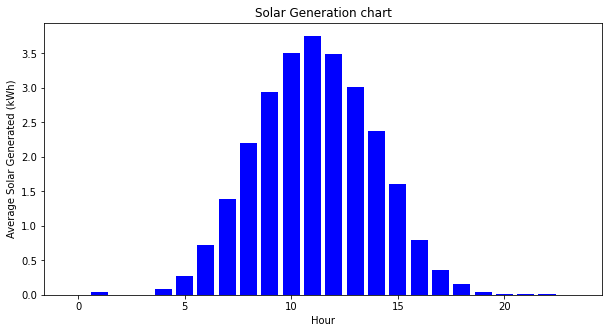

In [7]:
plt.figure(figsize=(10,5))
plt.bar(Solar_generation['Hour'],Solar_generation['Solar electricity generation (kWh)'],color='blue')
plt.title('Solar Generation chart')
plt.xlabel('Hour')
plt.ylabel('Average Solar Generated'+' '+'(kWh)')

Text(0, 0.5, 'Average Elecrtricity used (kWh)')

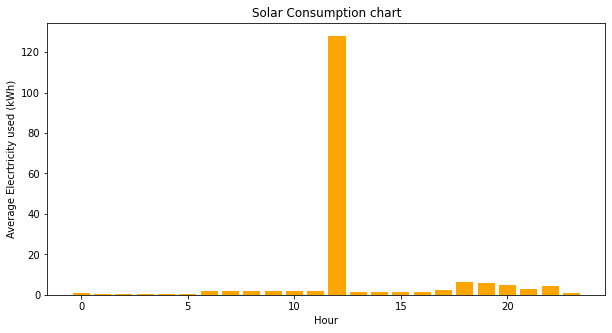

In [8]:
plt.figure(figsize=(10,5))
plt.bar(Solar_consumption['Hour'],Solar_consumption['Electricity usage (kWh)'],color='orange')
plt.title('Solar Consumption chart')
plt.xlabel('Hour')
plt.ylabel('Average Elecrtricity used'+' '+'(kWh)')

In [9]:
Solar_data = pd.merge(Solar_generation,Solar_consumption,on='Hour',how='inner')
Solar_data

,Hour,Solar electricity generation (kWh),Electricity usage (kWh)
0,0,0.000000,0.816471
1,1,0.035753,0.401552
2,2,0.000000,0.250623
3,3,0.000000,0.407688
4,4,0.078559,0.552038
5,5,0.270625,0.610852
6,6,0.722868,2.084071
7,7,1.394885,1.788123
8,8,2.206044,1.798899
9,9,2.941512,1.681553


<Figure size 1440x1440 with 0 Axes>

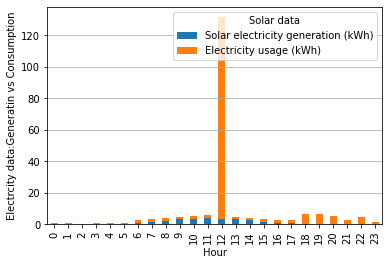

In [10]:
plt.figure(figsize=(20,20))
Solar_data.set_index('Hour',inplace=True)
Solar_data.plot(kind='bar',stacked=True)
plt.xlabel('Hour')
plt.ylabel('Electrcity data:Generatin vs Consumption')
plt.legend(title='Solar data')
plt.grid(axis='y')
plt.show()

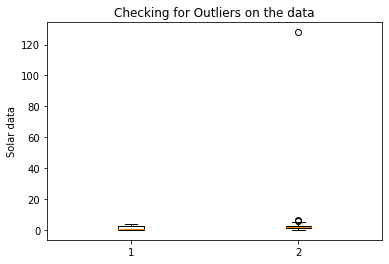

In [11]:
plt.boxplot(Solar_data[['Solar electricity generation (kWh)','Electricity usage (kWh)']])
plt.title('Checking for Outliers on the data')
plt.ylabel('Solar data')
plt.show()

In [12]:
#Calculating quantiles
Q1 = Solar_data['Electricity usage (kWh)'].quantile(0.25)
Q3 = Solar_data['Electricity usage (kWh)'].quantile(0.75)
IQR = Q3-Q1
#Setting Lower Bounds and Upper Bounds
lower_bound = Q1-(1.5*IQR)
upper_bound = Q3+(1.5*IQR)
#Identify outliers
outliers = Solar_data['Electricity usage (kWh)'][(Solar_data['Electricity usage (kWh)']<lower_bound)|
                                                 (Solar_data['Electricity usage (kWh)']>upper_bound)]
outliers

Hour
12    128.000444
18      6.140079
19      6.055943
Name: Electricity usage (kWh), dtype: float64

In [13]:
#Finding mean of non-outliers(whole data - outliers)
non_outliers = Solar_data['Electricity usage (kWh)'][(Solar_data['Electricity usage (kWh)']>=lower_bound)&(Solar_data['Electricity usage (kWh)']<=upper_bound)]
mean_for_outliers = non_outliers.mean()

In [14]:
#Replaing outliers with mean
Solar_data['Electricity usage (kWh)'] = np.where((Solar_data['Electricity usage (kWh)'] < lower_bound)|
                                                (Solar_data['Electricity usage (kWh)'] > upper_bound),
                                                mean_for_outliers,Solar_data['Electricity usage (kWh)'])
Solar_data

,Solar electricity generation (kWh),Electricity usage (kWh)
Hour,,
0,0.000000,0.816471
1,0.035753,0.401552
2,0.000000,0.250623
3,0.000000,0.407688
4,0.078559,0.552038
5,0.270625,0.610852
6,0.722868,2.084071
7,1.394885,1.788123
8,2.206044,1.798899


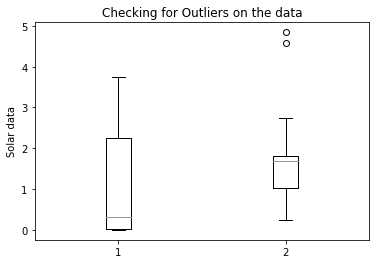

In [15]:
plt.boxplot(Solar_data[['Solar electricity generation (kWh)','Electricity usage (kWh)']])
plt.title('Checking for Outliers on the data')
plt.ylabel('Solar data')
plt.show()

In [16]:
#Amount of Electricty that would have been bought from the Electricity provider
Solar_data['Electricity_from_electricity_provider']= (Solar_data['Electricity usage (kWh)'] - Solar_data['Solar electricity generation (kWh)']).clip(lower=0)
print(Solar_data['Electricity_from_electricity_provider'])
print(Solar_data['Electricity_from_electricity_provider'].sum())

Hour
0     0.816471
1     0.365798
2     0.250623
3     0.407688
4     0.473479
5     0.340227
6     1.361203
7     0.393238
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.775348
17    2.128849
18    1.520702
19    1.634167
20    4.830945
21    2.723992
22    4.559416
23    1.097558
Name: Electricity_from_electricity_provider, dtype: float64
23.679706059282452


In [17]:
#Excess solar generated by the Solar panels not used
Solar_data['Excess_solar'] = (Solar_data['Solar electricity generation (kWh)']-Solar_data['Electricity usage (kWh)']).clip(lower=0)
Solar_data['Excess_solar']

Hour
0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.407145
9     1.259959
10    1.696866
11    2.066490
12    1.814526
13    1.499852
14    1.131674
15    0.252699
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
Name: Excess_solar, dtype: float64

In [18]:
Solar_data['Battery_charge_level'] = (Solar_data['Excess_solar'] - Solar_data['Electricity_from_electricity_provider']).clip(lower=0)
Solar_data['Battery_charge_level']

Hour
0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.407145
9     1.259959
10    1.696866
11    2.066490
12    1.814526
13    1.499852
14    1.131674
15    0.252699
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
Name: Battery_charge_level, dtype: float64

In [19]:
ceiling_value = 12.5
Solar_data['Cumm_battery_charge_level'] = Solar_data['Battery_charge_level'].cumsum().clip(upper=ceiling_value)
Solar_data['Cumm_battery_charge_level']

Hour
0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
6      0.000000
7      0.000000
8      0.407145
9      1.667104
10     3.363970
11     5.430460
12     7.244986
13     8.744838
14     9.876512
15    10.129211
16    10.129211
17    10.129211
18    10.129211
19    10.129211
20    10.129211
21    10.129211
22    10.129211
23    10.129211
Name: Cumm_battery_charge_level, dtype: float64

In [20]:
Solar_data['Electricty_purchase_with_solar'] = (Solar_data['Electricity usage (kWh)'] - Solar_data['Cumm_battery_charge_level']).clip(lower=0)
print(Solar_data['Electricty_purchase_with_solar'])
print(Solar_data['Electricty_purchase_with_solar'].sum())

Hour
0     0.816471
1     0.401552
2     0.250623
3     0.407688
4     0.552038
5     0.610852
6     2.084071
7     1.788123
8     1.391753
9     0.014449
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
Name: Electricty_purchase_with_solar, dtype: float64
8.31762113369863


In [21]:
# Savings when using Solar as at 1 Jan 2022
Solar_data['Electricity_savings'] = ((Solar_data['Electricity_from_electricity_provider']-Solar_data['Electricty_purchase_with_solar']).clip(lower=0)) * 0.17
print(Solar_data['Electricity_savings'])
print(Solar_data['Electricity_savings'].sum())

Hour
0     0.000000
1     0.000000
2     0.000000
3     0.000000
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.131809
17    0.361904
18    0.258519
19    0.277808
20    0.821261
21    0.463079
22    0.775101
23    0.186585
Name: Electricity_savings, dtype: float64
3.2760662729656884


In [22]:
Solar_data

,Solar electricity generation (kWh),Electricity usage (kWh),Electricity_from_electricity_provider,Excess_solar,Battery_charge_level,Cumm_battery_charge_level,Electricty_purchase_with_solar,Electricity_savings
Hour,,,,,,,,
0,0.000000,0.816471,0.816471,0.000000,0.000000,0.000000,0.816471,0.000000
1,0.035753,0.401552,0.365798,0.000000,0.000000,0.000000,0.401552,0.000000
2,0.000000,0.250623,0.250623,0.000000,0.000000,0.000000,0.250623,0.000000
3,0.000000,0.407688,0.407688,0.000000,0.000000,0.000000,0.407688,0.000000
4,0.078559,0.552038,0.473479,0.000000,0.000000,0.000000,0.552038,0.000000
5,0.270625,0.610852,0.340227,0.000000,0.000000,0.000000,0.610852,0.000000
6,0.722868,2.084071,1.361203,0.000000,0.000000,0.000000,2.084071,0.000000
7,1.394885,1.788123,0.393238,0.000000,0.000000,0.000000,1.788123,0.000000
8,2.206044,1.798899,0.000000,0.407145,0.407145,0.407145,1.391753,0.000000


In [23]:
Solar_dt = pd.merge(Solar_data,Solar,on='Hour')
#,how='inner'
Solar_dt

,Hour,Solar electricity generation (kWh)_x,Electricity usage (kWh)_x,Electricity_from_electricity_provider,Excess_solar,Battery_charge_level,Cumm_battery_charge_level,Electricty_purchase_with_solar,Electricity_savings,Date/hour start,Solar electricity generation (kWh)_y,Electricity usage (kWh)_y
0,0,0.0,0.816471,0.816471,0.0,0.0,0.000000,0.816471,0.000000,2020-01-01 00:00:00,0.0,1.509849
1,0,0.0,0.816471,0.816471,0.0,0.0,0.000000,0.816471,0.000000,2020-01-02 00:00:00,0.0,0.733927
2,0,0.0,0.816471,0.816471,0.0,0.0,0.000000,0.816471,0.000000,2020-01-03 00:00:00,0.0,1.689000
3,0,0.0,0.816471,0.816471,0.0,0.0,0.000000,0.816471,0.000000,2020-01-04 00:00:00,0.0,1.753825
4,0,0.0,0.816471,0.816471,0.0,0.0,0.000000,0.816471,0.000000,2020-01-05 00:00:00,0.0,0.981902
...,...,...,...,...,...,...,...,...,...,...,...,...
8755,23,0.0,1.097558,1.097558,0.0,0.0,10.129211,0.000000,0.186585,2020-12-27 23:00:00,0.0,0.121988
8756,23,0.0,1.097558,1.097558,0.0,0.0,10.129211,0.000000,0.186585,2020-12-28 23:00:00,0.0,0.133987
8757,23,0.0,1.097558,1.097558,0.0,0.0,10.129211,0.000000,0.186585,2020-12-29 23:00:00,0.0,0.183982
8758,23,0.0,1.097558,1.097558,0.0,0.0,10.129211,0.000000,0.186585,2020-12-30 23:00:00,0.0,1.185881


In [24]:
Solar_dt['Monthly'] = Solar_dt['Date/hour start'].dt.month
Solar_dt = Solar_dt.drop(Solar_dt.columns[[10,11]],axis=1)
Solar_dt

,Hour,Solar electricity generation (kWh)_x,Electricity usage (kWh)_x,Electricity_from_electricity_provider,Excess_solar,Battery_charge_level,Cumm_battery_charge_level,Electricty_purchase_with_solar,Electricity_savings,Date/hour start,Monthly
0,0,0.0,0.816471,0.816471,0.0,0.0,0.000000,0.816471,0.000000,2020-01-01 00:00:00,1
1,0,0.0,0.816471,0.816471,0.0,0.0,0.000000,0.816471,0.000000,2020-01-02 00:00:00,1
2,0,0.0,0.816471,0.816471,0.0,0.0,0.000000,0.816471,0.000000,2020-01-03 00:00:00,1
3,0,0.0,0.816471,0.816471,0.0,0.0,0.000000,0.816471,0.000000,2020-01-04 00:00:00,1
4,0,0.0,0.816471,0.816471,0.0,0.0,0.000000,0.816471,0.000000,2020-01-05 00:00:00,1
...,...,...,...,...,...,...,...,...,...,...,...
8755,23,0.0,1.097558,1.097558,0.0,0.0,10.129211,0.000000,0.186585,2020-12-27 23:00:00,12
8756,23,0.0,1.097558,1.097558,0.0,0.0,10.129211,0.000000,0.186585,2020-12-28 23:00:00,12
8757,23,0.0,1.097558,1.097558,0.0,0.0,10.129211,0.000000,0.186585,2020-12-29 23:00:00,12
8758,23,0.0,1.097558,1.097558,0.0,0.0,10.129211,0.000000,0.186585,2020-12-30 23:00:00,12


In [25]:
#Solar_dt = Solar_dt.drop(Solar_dt.columns[[10,11]],axis=1)
#Solar_dt

In [26]:
#Solar_dt = Solar_dt.drop_duplicates(subset='Monthly')
#Solar_dt

<Figure size 720x720 with 0 Axes>

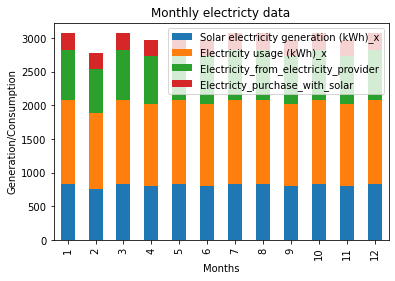

In [27]:
Monthly_data = Solar_dt.groupby('Monthly',as_index=False)[['Solar electricity generation (kWh)_x',
                                                          'Electricity usage (kWh)_x',
                                                          'Electricity_from_electricity_provider',
                                                          'Electricty_purchase_with_solar']].sum()
plt.figure(figsize=(10,10))
Monthly_data.set_index('Monthly',inplace=True)
Monthly_electricty_data = Monthly_data.plot(kind='bar',stacked=True)
Monthly_electricty_data.set_title('Monthly electricty data')
Monthly_electricty_data.set_ylabel('Generation/Consumption')
Monthly_electricty_data.set_xlabel('Months')
plt.show()

In [28]:
Solar_data['Electricty_purchase_with_solar'].sum()

8.31762113369863

In [29]:
Solar_data['Electricity_from_electricity_provider'].sum()

23.679706059282452

In [38]:
# The Cost Advantage of using Battery over buying electricty from the electricty provider
Cost_savings = (Solar_data['Electricty_purchase_with_solar'].sum()) /(Solar_data['Electricity_from_electricity_provider'].sum()) * 100
Cost_savings
print('Electricity purchases from the eclectricty provider reduces by 35%')

Electricity purchases from the eclectricty provider reduces by 35%


### Annual Savings Projection

In [31]:
#Projecting Electricty savings upto 20 years from 1 Jan 2022 with two scenarios:
#1)at IR=4% p.a 
P = 3.2760662729656884
r = 0.04
years = 20

for t in range(1,years+1):
        A = P * (1+r)**(t-1)
        print(f"Year {t}:${A:.2f}")
        
Savings_projection1 = print(f"Year {t}:${A:.2f}")

Year 1:$3.28
Year 2:$3.41
Year 3:$3.54
Year 4:$3.69
Year 5:$3.83
Year 6:$3.99
Year 7:$4.15
Year 8:$4.31
Year 9:$4.48
Year 10:$4.66
Year 11:$4.85
Year 12:$5.04
Year 13:$5.25
Year 14:$5.45
Year 15:$5.67
Year 16:$5.90
Year 17:$6.14
Year 18:$6.38
Year 19:$6.64
Year 20:$6.90
Year 20:$6.90


In [32]:
#2) IR=4.25% p.a
P = 3.2760662729656884
r = 0.0425
years = 20

for t in range(1,years+1):
        A = P * (1+r)**(t-1)
        print(f"Year {t}:${A:.2f}")
#Year {t}:$        
Savings_projection2 = print(f"{A:.2f}")
Savings_projection2

Year 1:$3.28
Year 2:$3.42
Year 3:$3.56
Year 4:$3.71
Year 5:$3.87
Year 6:$4.03
Year 7:$4.21
Year 8:$4.38
Year 9:$4.57
Year 10:$4.76
Year 11:$4.97
Year 12:$5.18
Year 13:$5.40
Year 14:$5.63
Year 15:$5.87
Year 16:$6.12
Year 17:$6.38
Year 18:$6.65
Year 19:$6.93
Year 20:$7.22
7.22


### NPV of Future Annual Savings

In [33]:
def calculate_npv(cash_flows,discount_rate):
    npvs=[]
    cumulative_npv = 0
    
    
    for t,cash_flow in enumerate(cash_flows):
        pv = cash_flow/(1+ discount_rate)**t
        cumulative_npv = pv
        npvs.append(cumulative_npv)
    return npvs
cash_flows = [3.28,3.41,3.54,3.69,3.83,3.99,4.15,4.31,4.48,4.66,4.85,5.04,5.25,5.45,5.67,5.90,6.14,6.38,6.64,6.90]
discount_rate = 0.06

npvs_at_each_point = calculate_npv(cash_flows,discount_rate)
#print ("NPV at each point:")
for year,npv in enumerate(npvs_at_each_point):
    print(f"Year {year}:NPV {npv:.2f}")

Year 0:NPV 3.28
Year 1:NPV 3.22
Year 2:NPV 3.15
Year 3:NPV 3.10
Year 4:NPV 3.03
Year 5:NPV 2.98
Year 6:NPV 2.93
Year 7:NPV 2.87
Year 8:NPV 2.81
Year 9:NPV 2.76
Year 10:NPV 2.71
Year 11:NPV 2.66
Year 12:NPV 2.61
Year 13:NPV 2.56
Year 14:NPV 2.51
Year 15:NPV 2.46
Year 16:NPV 2.42
Year 17:NPV 2.37
Year 18:NPV 2.33
Year 19:NPV 2.28


In [34]:
def calculate_npv(cash_flows,discount_rate):
    npvs=[]
    cumulative_npv = 0
    
    
    for t,cash_flow in enumerate(cash_flows):
        pv = cash_flow/(1+ discount_rate)**t
        cumulative_npv = pv
        npvs.append(cumulative_npv)
    return npvs
cash_flows = [3.28,3.42,3.56,3.71,3.87,4.03,4.21,4.38,4.57,4.76,4.97,5.18,5.40,5.63,5.87,6.12,6.38,6.65,6.93,7.22]
discount_rate = 0.06

npvs_at_each_point = calculate_npv(cash_flows,discount_rate)
#print ("NPV at each point:")
for year,npv in enumerate(npvs_at_each_point):
    print(f"Year {year}:NPV {npv:.2f}")

Year 0:NPV 3.28
Year 1:NPV 3.23
Year 2:NPV 3.17
Year 3:NPV 3.11
Year 4:NPV 3.07
Year 5:NPV 3.01
Year 6:NPV 2.97
Year 7:NPV 2.91
Year 8:NPV 2.87
Year 9:NPV 2.82
Year 10:NPV 2.78
Year 11:NPV 2.73
Year 12:NPV 2.68
Year 13:NPV 2.64
Year 14:NPV 2.60
Year 15:NPV 2.55
Year 16:NPV 2.51
Year 17:NPV 2.47
Year 18:NPV 2.43
Year 19:NPV 2.39


### IRR ( Internal Rate of Return )

In [35]:
#!pip install numpy-financial
import numpy_financial as npf
initial_cost = -7000
annual_savings = [3.28,3.22,3.15,3.10,3.03,2.98,2.93,2.87,2.81,2.76,2.71,2.66,2.61,2.56,2.51,2.46,2.42,2.37,2.33,2.28]
cash_flows = [initial_cost] + annual_savings 
irr = npf.irr(cash_flows)
print(f"IRR is :{irr:.2%}")

IRR is :-28.57%


In [36]:
import numpy_financial as npf
initial_cost = -7000
annual_savings = [3.28,3.23,3.17,3.11,3.07,3.01,2.97,2.91,2.87,2.82,2.78,2.73,2.68,2.64,2.60,2.55,2.51,2.47,2.43,2.39]
cash_flows = [initial_cost] + annual_savings 
irr = npf.irr(cash_flows)
print(f"IRR is :{irr:.2%}")

IRR is :-28.40%
